In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.array([[1,1],
     [1,-1],
     [-1,1],
     [-1,-1]])

y = np.array([1,-1,-1,-1])

In [3]:
print(x,y)

[[ 1  1]
 [ 1 -1]
 [-1  1]
 [-1 -1]] [ 1 -1 -1 -1]


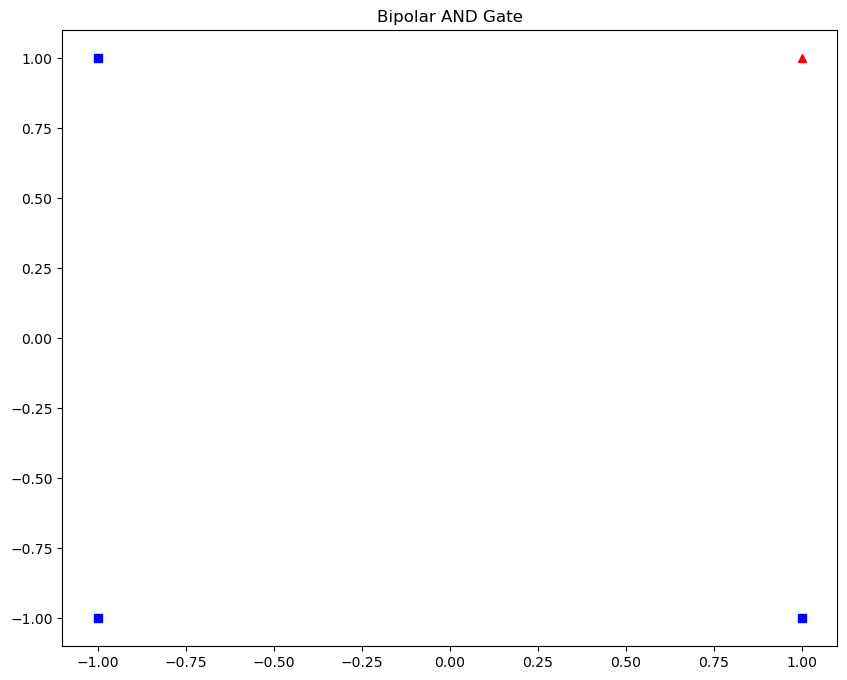

In [4]:
plt.figure(figsize=(10,8))
plt.plot(x[:,0][y==1],x[:,1][y==1],'r^')
plt.plot(x[:,0][y==-1],x[:,1][y==-1],'bs')
plt.title("Bipolar AND Gate")
plt.show()

In [5]:
def result(x1,x2,t,initial_weight1,initial_weight2,bias,estimated_output,predicted_output,updated_weight1=0,updated_weight2=0,updated_bias=0):
        print(f"| {x1} | {x2} | {t} | {initial_weight1} | {initial_weight2} | {bias} | {estimated_output} | {predicted_output} | {updated_weight1} | {updated_weight2} | {updated_bias} |")

In [6]:
def activation_func(estimated_output):
    if(estimated_output > 0):
        return 1
    elif(estimated_output == 0):
        return 0
    else:
        return -1

In [7]:
def preceptron(x,epochs):

    initial_weight1 = initial_weight2 = bias = 0
    upd_weight1 = upd_weight2 = upd_bias = 0
    estimated_output = 0
    learning_rate = 1

    for epoch in range(epochs):

        print(f"Epoch:{epoch+1}")
        
        for idx,x_i in enumerate(x):

            value_1 = x_i[0] * initial_weight1
            value_2 = x_i[1] * initial_weight2

            #Finding the summation
            estimated_output = (value_1 + value_2) + bias

            
            #Activation Function
            predicted_output = activation_func(estimated_output)

            if(y[idx] != predicted_output):
                upd_weight1 = initial_weight1 + (learning_rate * y[idx] * x_i[0])
                upd_weight2 = initial_weight2 + (learning_rate * y[idx] * x_i[1])
                upd_bias = bias + (learning_rate * y[idx])

                result(x_i[0],x_i[1],y[idx],initial_weight1,initial_weight2,bias,estimated_output,predicted_output,upd_weight1,upd_weight1,upd_bias)

                initial_weight1 = upd_weight1
                initial_weight2 = upd_weight2
                bias = upd_bias
            else:
                upd_weight1 = initial_weight1
                upd_weight2 = initial_weight2
                upd_bias = bias

                result(x_i[0],x_i[1],y[idx],initial_weight1,initial_weight2,bias,estimated_output,predicted_output,upd_weight1,upd_weight1,upd_bias)

    weights = [upd_weight1,upd_weight2,upd_bias]
    print(weights)

In [8]:
print(f"| x1 | x2 | t | w1 | w2 | b | est.op | y_hat | upd.w1 | upd.w2 | upd.b |")
preceptron(x,2)

| x1 | x2 | t | w1 | w2 | b | est.op | y_hat | upd.w1 | upd.w2 | upd.b |
Epoch:1
| 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 |
| 1 | -1 | -1 | 1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 |
| -1 | 1 | -1 | 0 | 2 | 0 | 2 | 1 | 1 | 1 | -1 |
| -1 | -1 | -1 | 1 | 1 | -1 | -3 | -1 | 1 | 1 | -1 |
Epoch:2
| 1 | 1 | 1 | 1 | 1 | -1 | 1 | 1 | 1 | 1 | -1 |
| 1 | -1 | -1 | 1 | 1 | -1 | -1 | -1 | 1 | 1 | -1 |
| -1 | 1 | -1 | 1 | 1 | -1 | -1 | -1 | 1 | 1 | -1 |
| -1 | -1 | -1 | 1 | 1 | -1 | -3 | -1 | 1 | 1 | -1 |
[1, 1, -1]
